In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [45]:
df = pd.read_csv('laptops.csv', encoding='latin1')

In [46]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [47]:
df.drop(columns='Unnamed: 0',inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [49]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [50]:
df.duplicated().sum()

np.int64(28)

In [51]:
# df.drop_duplicates(inplace=True)

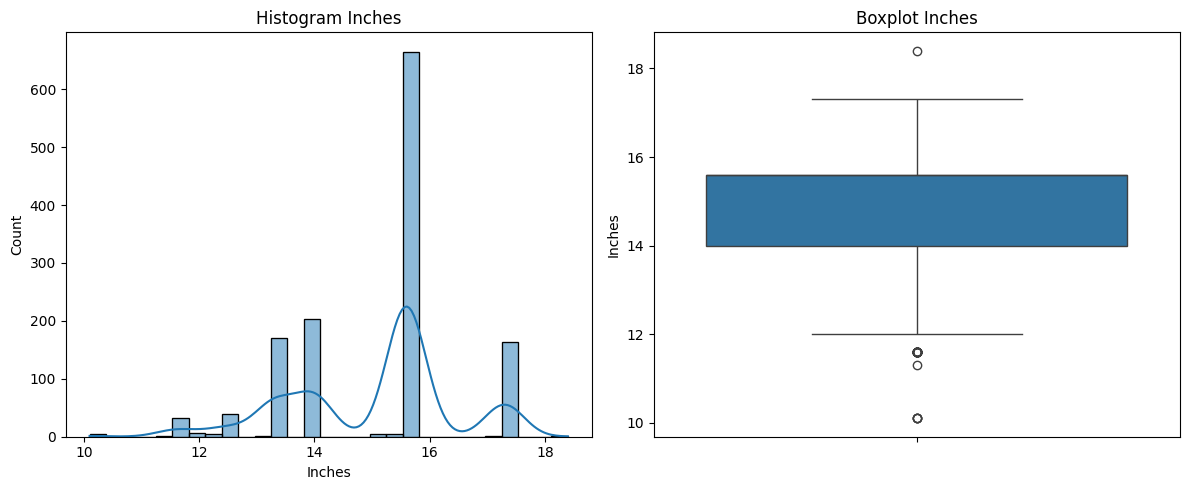

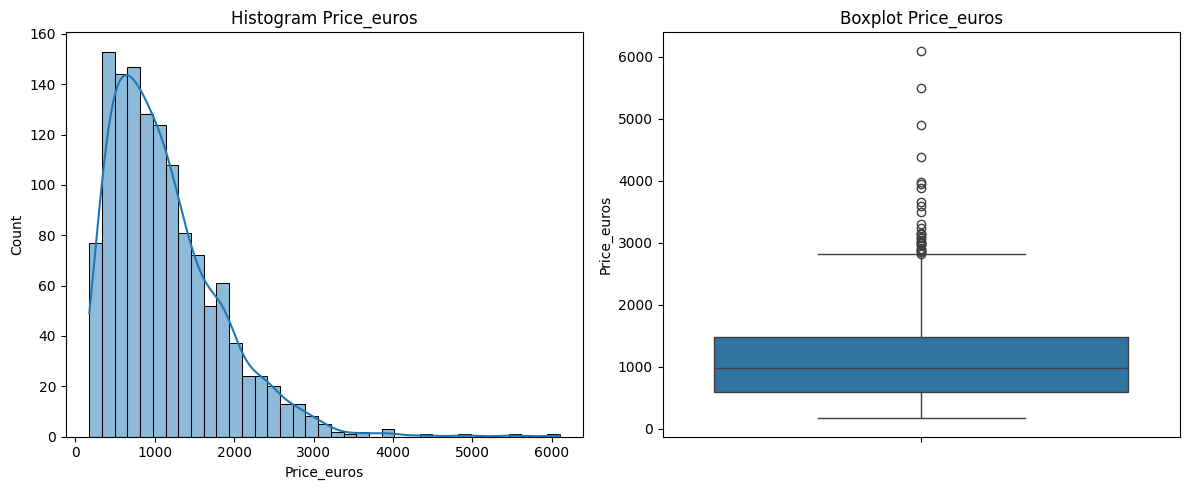

In [52]:
for col in df.select_dtypes('number'):
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    
    sns.histplot(df[col], kde=True, ax = axes[0])
    axes[0].set_title(f'Histogram {col}')
    
    sns.boxplot(df[col],ax = axes[1])
    axes[1].set_title(f'Boxplot {col}')
    
    plt.tight_layout()
    plt.show()

In [53]:
q1 = df['Price_euros'].quantile(0.25)
q3 = df['Price_euros'].quantile(0.75)

df['Price_Class'] = df['Price_euros'].apply(lambda x: 0 if x <= q1 else (1 if x <= q3 else 2)) # 0 = low, 1 = medium, 2 = high
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
 12  Price_Class       1303 non-null   int64  
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [54]:
df['Price_Class'].value_counts()

Price_Class
1    648
0    329
2    326
Name: count, dtype: int64

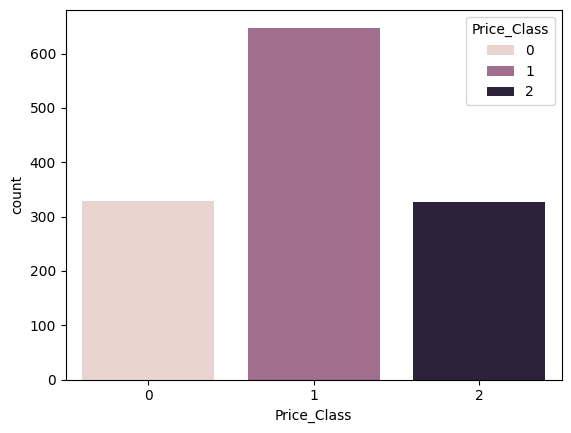

In [55]:
sns.countplot(x=df['Price_Class'], hue=df['Price_Class'])
plt.show()

<Axes: >

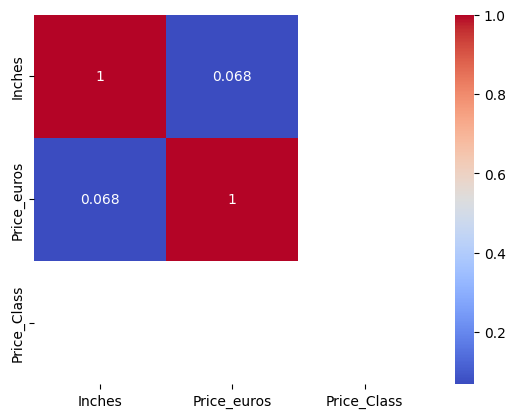

In [56]:
dfn = df[['Inches','Price_euros','Price_Class']].copy(deep=True)
dfn['Price_Class'] = dfn['Price_Class'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
})
sns.heatmap(dfn.corr(),annot=True,cmap='coolwarm')

In [57]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [58]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

<Axes: >

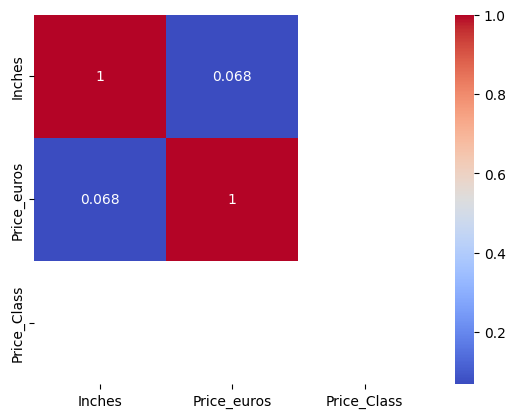

In [59]:
dfn = df[['Inches','Price_euros','Price_Class']].copy(deep=True)
dfn['Price_Class'] = dfn['Price_Class'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
})
sns.heatmap(dfn.corr(),annot=True,cmap='coolwarm')

# Data Preprocessing

data yang perlu di regex: Ram, Storage, Weight

In [60]:
df['Ram'] = df['Ram'].str.extract(r'^([0-9]+)').astype(int)
df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int64

In [61]:
df['Weight'] = df['Weight'].str.extract(r'^([0-9\.]+)').astype(float)
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [62]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [63]:
def extract_storage_total(text, storage_type):
    total = 0
    for part in text.split('+'):
        part = part.strip()
        if storage_type in part:
            num = ''.join(filter(str.isdigit, part))
            total += int(num) if num else 0
    return total

df['SSD'] = df['Memory'].apply(lambda x: extract_storage_total(x, 'SSD'))
df['HDD'] = df['Memory'].apply(lambda x: extract_storage_total(x, 'HDD'))
df['Flash'] = df['Memory'].apply(lambda x: extract_storage_total(x, 'Flash'))

In [64]:
print(df['SSD'].value_counts())
print(df['HDD'].value_counts())
df['Flash']

SSD
256     498
0       460
128     172
512     138
1        16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: count, dtype: int64
HDD
0      727
1      407
500    134
2       32
32       1
128      1
10       1
Name: count, dtype: int64


0         0
1       128
2         0
3         0
4         0
       ... 
1298      0
1299      0
1300     64
1301      0
1302      0
Name: Flash, Length: 1303, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
 12  Price_Class       1303 non-null   int64  
 13  SSD               1303 non-null   int64  
 14  HDD               1303 non-null   int64  
 15  Flash             1303 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory 

In [66]:
df['Processor_speed'] = df['Cpu'].str.extract(r'([A-Za-z0-9\.]+)$')
df['Processor_speed'] = df['Processor_speed'].str.extract(r'^([0-9\.]+)').astype(float)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_Class,SSD,HDD,Flash,Processor_speed
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1,128,0,0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1,0,0,128,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2,512,0,0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2,256,0,0,3.1


In [67]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [68]:
for i in ['Android','No OS']:
    df = df[df['OpSys'] != i]

In [69]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Name: count, dtype: int64

In [70]:
df['TypeName'].value_counts()

TypeName
Notebook              671
Gaming                196
Ultrabook             195
2 in 1 Convertible    119
Workstation            29
Netbook                25
Name: count, dtype: int64

In [71]:
laptop_type_asc = df.groupby('TypeName')['Price_euros'].mean().sort_values().index
type_dicto = {label: idx for idx,label in enumerate(laptop_type_asc)}
type_dicto

{'Netbook': 0,
 'Notebook': 1,
 '2 in 1 Convertible': 2,
 'Ultrabook': 3,
 'Gaming': 4,
 'Workstation': 5}

In [72]:
df['TypeName'] = df['TypeName'].map(type_dicto)

In [73]:
df['Company'].value_counts()

Company
Dell         297
HP           262
Lenovo       248
Asus         154
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Google         3
Chuwi          3
LG             3
Fujitsu        3
Huawei         2
Xiaomi         1
Name: count, dtype: int64

In [74]:
company_asc = df.groupby('Company')['Price_euros'].mean().sort_values().index
comp_dicto = {label: idx for idx,label in enumerate(company_asc)}
comp_dicto

{'Vero': 0,
 'Mediacom': 1,
 'Chuwi': 2,
 'Acer': 3,
 'Fujitsu': 4,
 'Xiaomi': 5,
 'HP': 6,
 'Asus': 7,
 'Dell': 8,
 'Lenovo': 9,
 'Toshiba': 10,
 'Samsung': 11,
 'Huawei': 12,
 'Apple': 13,
 'Microsoft': 14,
 'Google': 15,
 'MSI': 16,
 'LG': 17,
 'Razer': 18}

In [75]:
df['Company'] = df['Company'].map(comp_dicto)

In [76]:
OS_val = df.groupby('OpSys')['Price_euros'].mean().sort_values().index
OS_dicto = {label: idx for idx,label in enumerate(OS_val)}
OS_dicto

{'Chrome OS': 0,
 'Linux': 1,
 'Windows 10': 2,
 'Mac OS X': 3,
 'Windows 10 S': 4,
 'Windows 7': 5,
 'macOS': 6}

In [77]:
df['OpSys'] = df['OpSys'].map(OS_dicto)

In [78]:
df['Gpu_brand'] = df['Gpu'].str.extract(r'^([A-Za-z]+)')
gpu_val = df.groupby('Gpu_brand')['Price_euros'].mean().sort_values().index
gpu_dicto = {label: idx for idx,label in enumerate(gpu_val)}
gpu_dicto

{'ARM': 0, 'AMD': 1, 'Intel': 2, 'Nvidia': 3}

In [79]:
df['Gpu_brand'] = df['Gpu_brand'].map(gpu_dicto)

In [80]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_Class,SSD,HDD,Flash,Processor_speed,Gpu_brand
0,13,MacBook Pro,3,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,6,1.37,1339.69,1,128,0,0,2.3,2
1,13,Macbook Air,3,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,6,1.34,898.94,1,0,0,128,1.8,2
3,13,MacBook Pro,3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,6,1.83,2537.45,2,512,0,0,2.7,1
4,13,MacBook Pro,3,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,6,1.37,1803.60,2,256,0,0,3.1,2
5,3,Aspire 3,1,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,2,2.10,400.00,0,0,500,0,3.0,1


In [81]:
df['screenfeature'] = df['ScreenResolution'].str.extract(r'^(.*?)\s*[0-9]{3,4}x[0-9]{3,4}')

In [82]:
df['screenfeature'].value_counts()

screenfeature
Full HD                                484
                                       285
IPS Panel Full HD                      221
IPS Panel Full HD / Touchscreen         53
Full HD / Touchscreen                   47
Touchscreen                             32
IPS Panel Retina Display                17
Quad HD+ / Touchscreen                  15
IPS Panel 4K Ultra HD                   12
IPS Panel 4K Ultra HD / Touchscreen     11
IPS Panel                               11
IPS Panel Touchscreen                   11
4K Ultra HD / Touchscreen               10
4K Ultra HD                              7
IPS Panel Quad HD+ / Touchscreen         6
IPS Panel Quad HD+                       5
Quad HD+                                 3
IPS Panel Touchscreen / 4K Ultra HD      2
Touchscreen / Quad HD+                   1
Touchscreen / Full HD                    1
Touchscreen / 4K Ultra HD                1
Name: count, dtype: int64

In [83]:
df.drop(columns=['Product','Cpu','Gpu','Memory','ScreenResolution'],inplace=True)

In [84]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Price_Class,SSD,HDD,Flash,Processor_speed,Gpu_brand,screenfeature
0,13,3,13.3,8,6,1.37,1339.69,1,128,0,0,2.3,2,IPS Panel Retina Display
1,13,3,13.3,8,6,1.34,898.94,1,0,0,128,1.8,2,
3,13,3,15.4,16,6,1.83,2537.45,2,512,0,0,2.7,1,IPS Panel Retina Display
4,13,3,13.3,8,6,1.37,1803.60,2,256,0,0,3.1,2,IPS Panel Retina Display
5,3,1,15.6,4,2,2.10,400.00,0,0,500,0,3.0,1,


In [85]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr('spearman'),annot=True,cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'IPS Panel Retina Display'

<Figure size 1200x1000 with 0 Axes>

In [43]:
df.drop(columns=['Inches','Weight','Price_euros'],inplace=True)

In [44]:
df.head()

,Company,TypeName,Ram,OpSys,Price_Class,SSD,HDD,Flash,Processor_speed,Gpu_brand
0,13,3,8,6,1,128,0,0,2.3,2
1,13,3,8,6,1,0,0,128,1.8,2
3,13,3,16,6,2,512,0,0,2.7,1
4,13,3,8,6,2,256,0,0,3.1,2
5,3,1,4,2,0,0,500,0,3.0,1


In [45]:
x = df.drop(columns='Price_Class')
y = df['Price_Class']

In [46]:
def train_test_split(x, y, test_size=0.2, stratify=None, random_state=None):
    np.random.seed(random_state)
    
    x = np.array(x)
    y = np.array(y)
    
    if stratify is not None:
        unique_classes, y_indices = np.unique(stratify, return_inverse=True)
        test_indices = np.array([], dtype=int)
        train_indices = np.array([], dtype=int)
        
        for class_index in range(len(unique_classes)):
            class_indices = np.where(y_indices == class_index)[0]
            np.random.shuffle(class_indices)
            
            n_test = int(len(class_indices) * test_size)
            test_indices = np.concatenate((test_indices, class_indices[:n_test]))
            train_indices = np.concatenate((train_indices, class_indices[n_test:]))
    else:
        indices = np.arange(len(y))
        np.random.shuffle(indices)
        
        n_test = int(len(y) * test_size)
        test_indices = indices[:n_test]
        train_indices = indices[n_test:]
    
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
print(f'Jumlah x_train : {x_train.shape[0]} baris')
print(f'Jumlah x_test : {x_test.shape[0]} baris')
print(f'Jumlah y_train : {y_train.shape[0]} baris')
print(f'Jumlah y_test : {y_test.shape[0]} baris')

Jumlah x_train : 989 baris
Jumlah x_test : 246 baris
Jumlah y_train : 989 baris
Jumlah y_test : 246 baris


In [47]:
print(f'Proporsi Kelas Harga pada y_train :')
print(pd.Series(y_train).value_counts())

Proporsi Kelas Harga pada y_train :
1    502
2    261
0    226
Name: count, dtype: int64


In [48]:
def smote(x, y, random_state=42, k=5):
    np.random.seed(random_state)
    
    unique_classes = np.unique(y)
    class_counts = {class_label: np.sum(y == class_label) for class_label in unique_classes}
    max_class_count = max(class_counts.values())
    
    x_resampled = x.tolist()
    y_resampled = y.tolist()
    
    for class_label in unique_classes:
        if class_counts[class_label] < max_class_count:
            class_indices = np.where(y == class_label)[0]
            class_samples = x[class_indices]
            
            n_samples_to_generate = max_class_count - class_counts[class_label]
            
            for _ in range(n_samples_to_generate):
                sample_index = np.random.choice(class_indices)
                sample = x[sample_index]
                
                distances = np.linalg.norm(class_samples - sample, axis=1)
                nearest_neighbors = np.argsort(distances)[1:k+1]
                
                neighbor_index = np.random.choice(nearest_neighbors)
                neighbor = class_samples[neighbor_index]
                
                diff = neighbor - sample
                synthetic_sample = sample + np.random.rand() * diff
                
                x_resampled.append(synthetic_sample)
                y_resampled.append(class_label)
    
    return np.array(x_resampled), np.array(y_resampled)

x_train_resampled, y_train_resampled = smote(x_train, y_train)

In [49]:
print(f'Proporsi Kelas Harga pada y_train :')
print(pd.Series(y_train_resampled).value_counts())

Proporsi Kelas Harga pada y_train :
0    502
1    502
2    502
Name: count, dtype: int64


In [50]:
def min_max_scaler(train, test):
    min_val = np.min(train, axis=0)
    max_val = np.max(train, axis=0)
    epsilon = 1e-10
    train_scaled = (train - min_val) / (max_val - min_val + epsilon)
    test_scaled = (test - min_val) / (max_val - min_val + epsilon)
    
    return train_scaled, test_scaled

x_train_scaled, x_test_scaled = min_max_scaler(x_train_resampled, x_test)

In [51]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

class KNeighborsClassifierManual:
    def __init__(self, n_neighbors=5, metric='euclidean', p=3):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common
    
    def _distance(self, a, b):
        if self.metric == 'euclidean':
            return euclidean_distance(a, b)
        elif self.metric == 'manhattan':
            return manhattan_distance(a, b)
        elif self.metric == 'minkowski':
            return minkowski_distance(a, b, self.p)
        else:
            raise ValueError(f"Unknown metric: {self.metric}")

In [52]:
def cross_val_score_knn(knn, X, y, cv=5):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    fold_sizes = np.full(cv, X.shape[0] // cv, dtype=int)
    fold_sizes[:X.shape[0] % cv] += 1
    current = 0
    scores = []

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        current = stop

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        scores.append(accuracy)

    return np.array(scores)

In [53]:
def grid_search_knn(X_train, y_train, param_grid, cv=5):
    best_score = 0
    best_params = None
    for n_neighbors in param_grid['n_neighbors']:
        for metric in param_grid['metric']:
            for p in param_grid.get('p', [3]):
                knn = KNeighborsClassifierManual(n_neighbors=n_neighbors, metric=metric, p=p)
                scores = cross_val_score_knn(knn, X_train, y_train, cv=cv)
                mean_score = scores.mean()
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'n_neighbors': n_neighbors, 'metric': metric, 'p': p}
    return best_params, best_score

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3, 4, 5] 
}

In [ ]:
best_params, best_score = grid_search_knn(x_train_scaled, y_train_resampled, param_grid, cv=5)
print(f'Best parameters: {best_params}')
print(f'Best cross-validation score: {best_score}')

In [55]:
knn = KNeighborsClassifierManual(**best_params)
knn.fit(x_train_resampled, y_train_resampled)
pred = knn.predict(x_test_scaled) 

In [56]:
accuracy = np.mean(pred == y_test)
print(f'Akurasi Model KNN {accuracy}')

Akurasi Model KNN 0.22764227642276422
